# Area Plots, Histograms, and Bar Plots

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'],axis = 1, inplace = True)

In [5]:
df_can.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace = True)

In [7]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
all(isinstance(column,str) for column in df_can.columns)

False

In [9]:
df_can.columns= list(map(str,df_can.columns))

In [10]:
df_can.set_index('Country',inplace = True)

In [11]:
df_can['Total'] = df_can.sum(axis = 1)

<ipython-input-11-327e637cc9af>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [12]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [13]:
years= list(map(str,range(1980,2014)))

# Visualizing Data using Matplotlib

In [14]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


## Area Plots

In [17]:
df_can.sort_values(['Total'],ascending = False,inplace = True)

In [18]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [23]:
df_top5 = df_can.head()
df_top5 = df_top5[years]
df_top5 = df_top5.transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

Text(0, 0.5, 'number of immigrants')

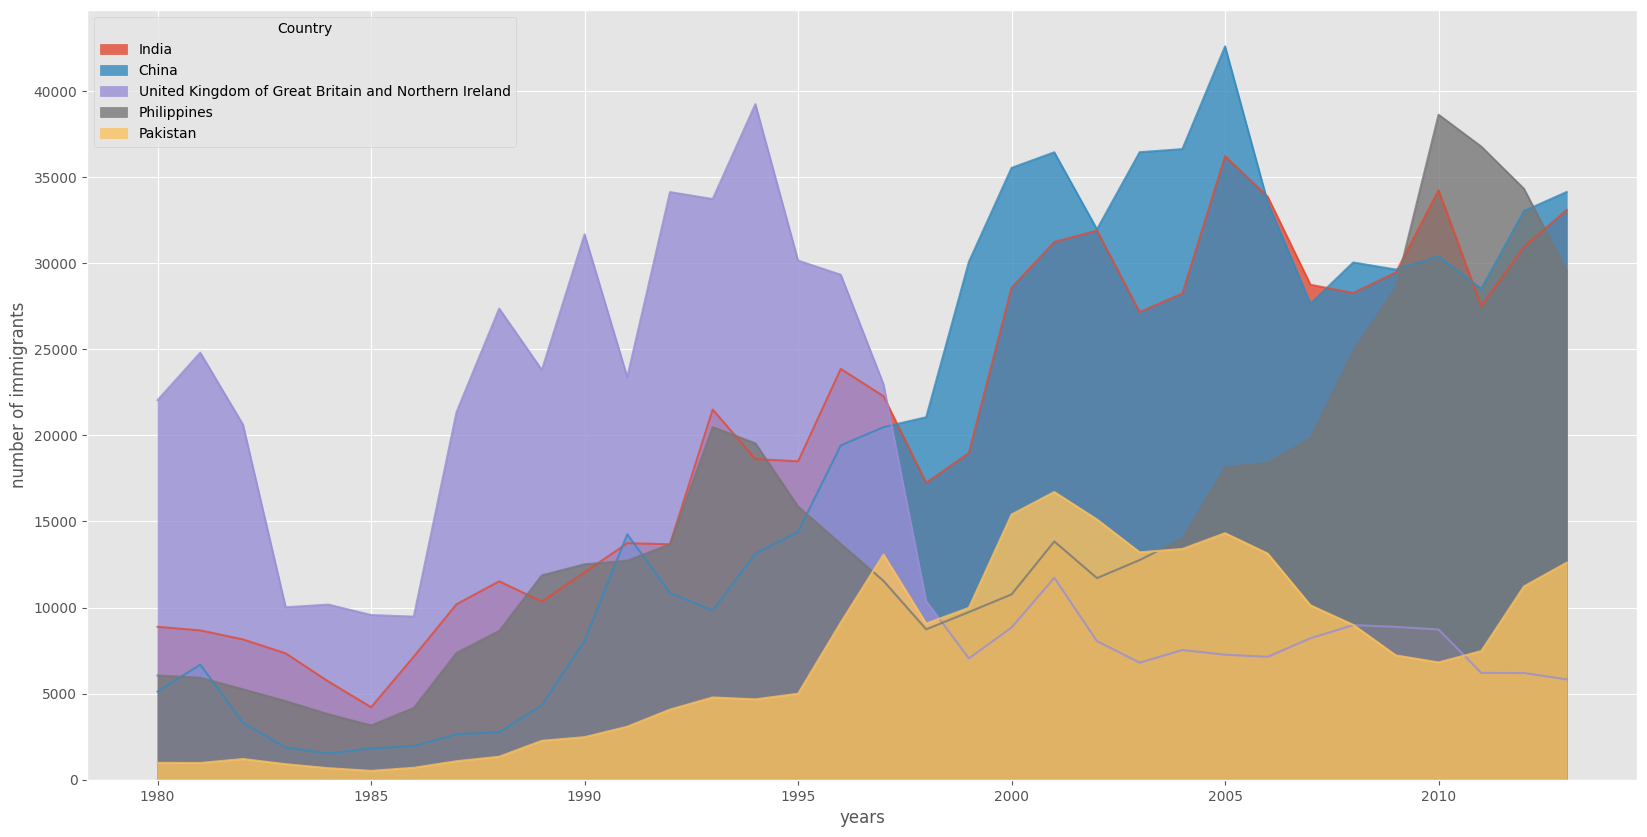

In [29]:
df_top5.index = df_top5.index.map(int)

df_top5.plot(kind = 'area',
             stacked = False,
             alpha = 0.8,
             figsize = (20,10))
plt.xlabel('years')
plt.ylabel('number of immigrants')


## Two types of plotting

*Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' *

Text(0.5, 1.0, 'immigrant to can from 5 countries')

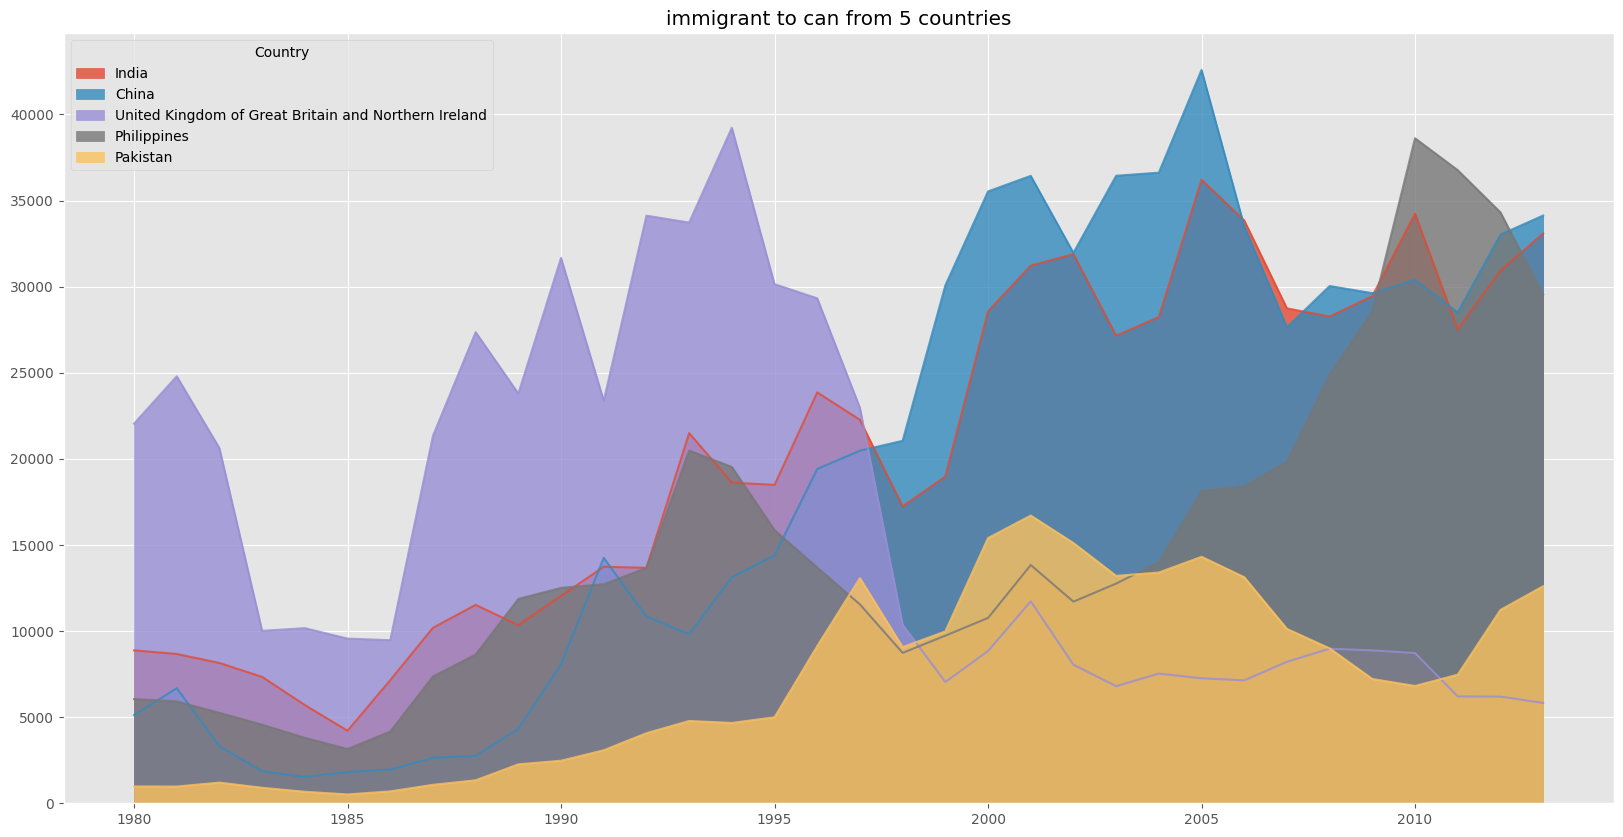

In [32]:
df_top5.plot(kind = 'area', alpha =0.8,figsize = (20,10),stacked = False)
plt.title('immigrant to can from 5 countries')

*Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) *

Text(0, 0.5, 'numbers of immigrants')

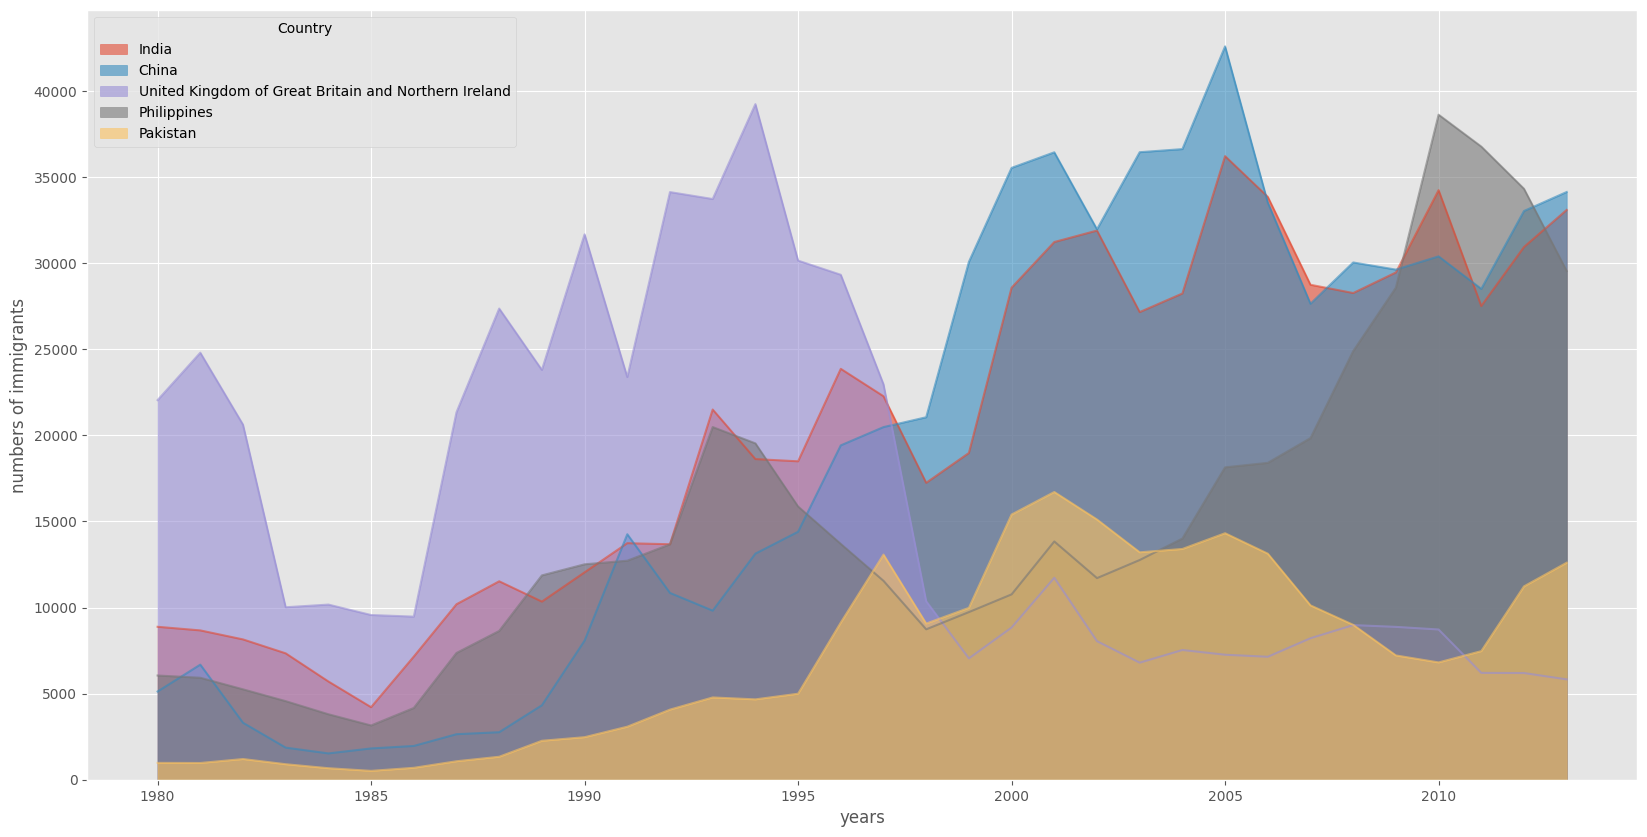

In [33]:
ax = df_top5.plot(kind = 'area',stacked = False, figsize = (20,10),alpha =0.6)
ax.set_xlabel('years')
ax.set_ylabel('numbers of immigrants')

Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [68]:
df_can.sort_values(['Total'],ascending = True,inplace= True)

In [73]:
df_least5 = df_can.head()
df_least5 = df_least5[years].transpose()
df_least5.index = df_least5.index.map(int)

In [74]:
years = list(map(str,range(1980,2014)))

In [75]:
all(isinstance(column,str) for column in df_least5.index)

False

<Axes: >

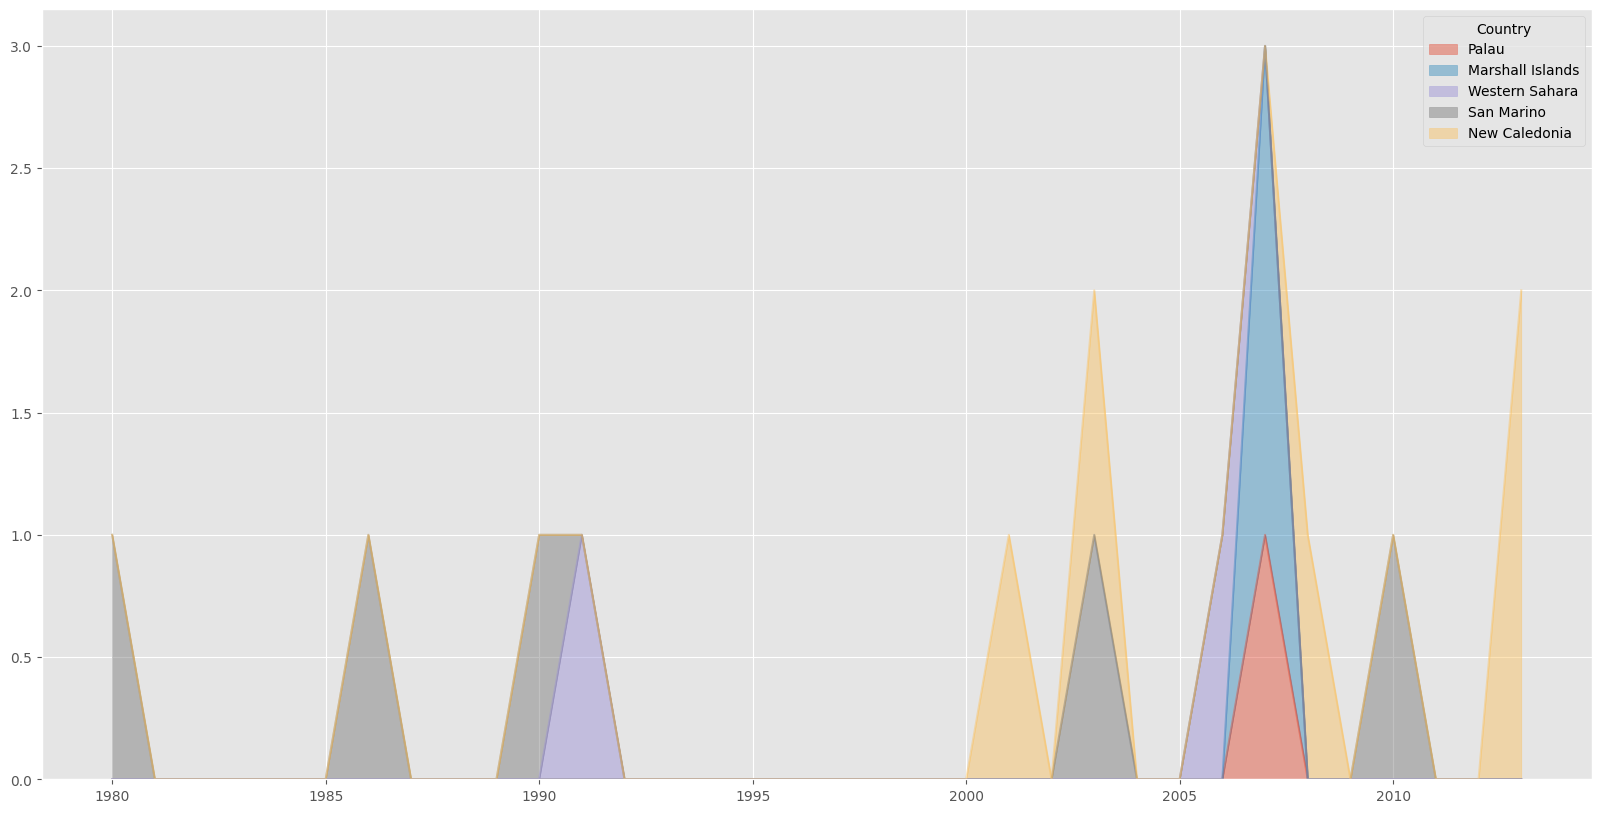

In [76]:
df_least5.plot(kind = 'area',stacked = True,figsize = (20,10),alpha = 0.45)

Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'numbers of immigrants')

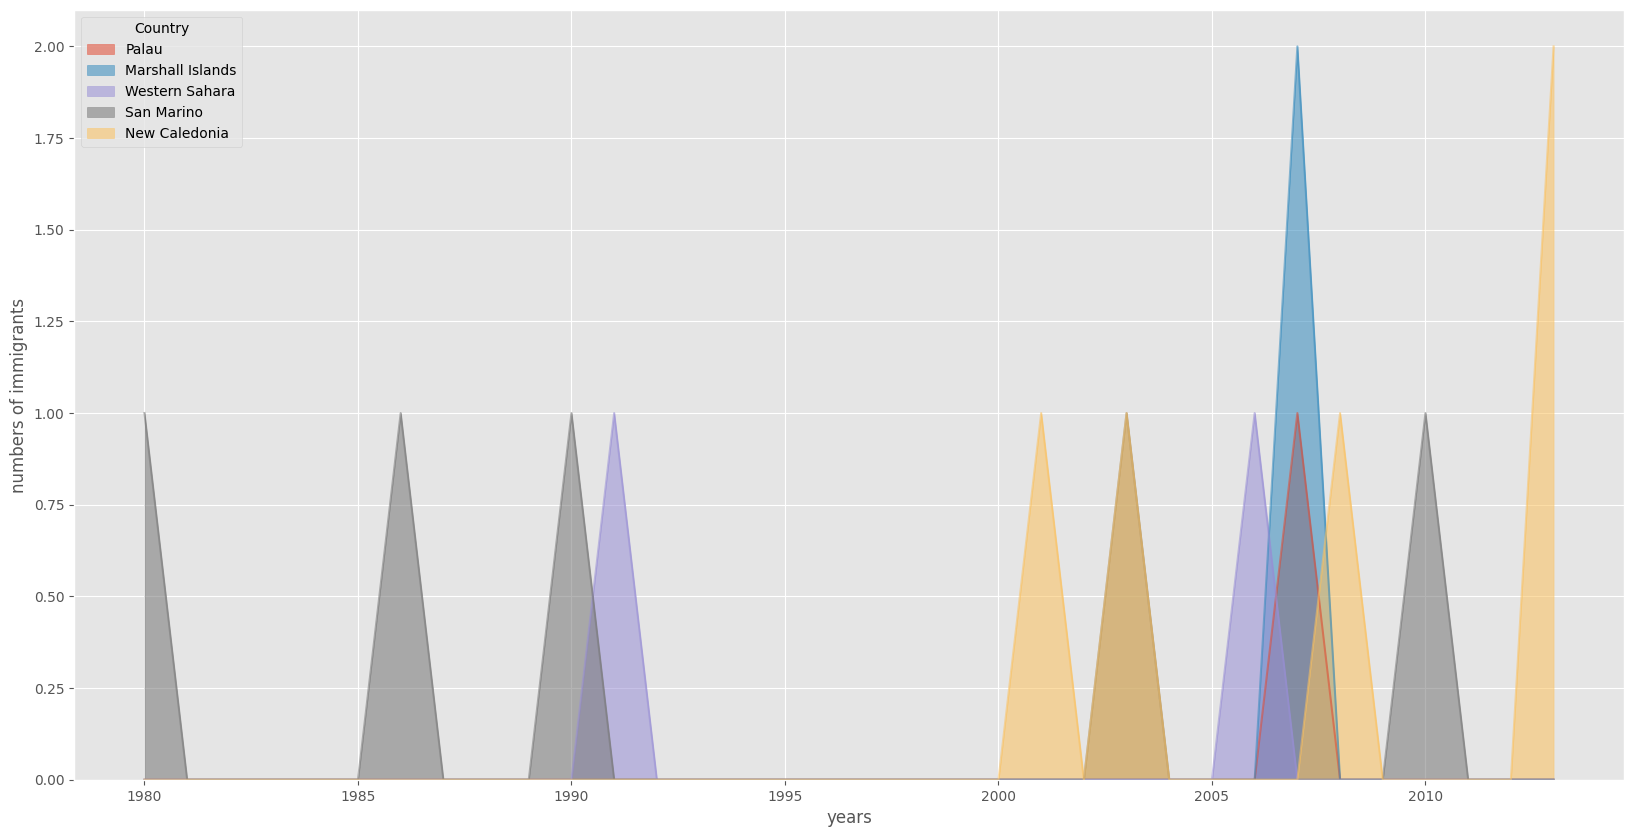

In [78]:
ax = df_least5.plot(kind = 'area',stacked = False,figsize = (20,10),alpha =0.55)
ax.set_xlabel('years')
ax.set_ylabel('numbers of immigrants')

## Histograms

In [80]:
df_can['2013']

Country
Palau                                                       0
Marshall Islands                                            0
Western Sahara                                              0
San Marino                                                  0
New Caledonia                                               2
                                                        ...  
Pakistan                                                12603
Philippines                                             29544
United Kingdom of Great Britain and Northern Ireland     5827
China                                                   34129
India                                                   33087
Name: 2013, Length: 195, dtype: int64

In [81]:
cnt,bin_edges = np.histogram(df_can['2013'])
print(cnt)
print(bin_edges)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

Text(0.5, 0, 'number of immigrant in 2013')

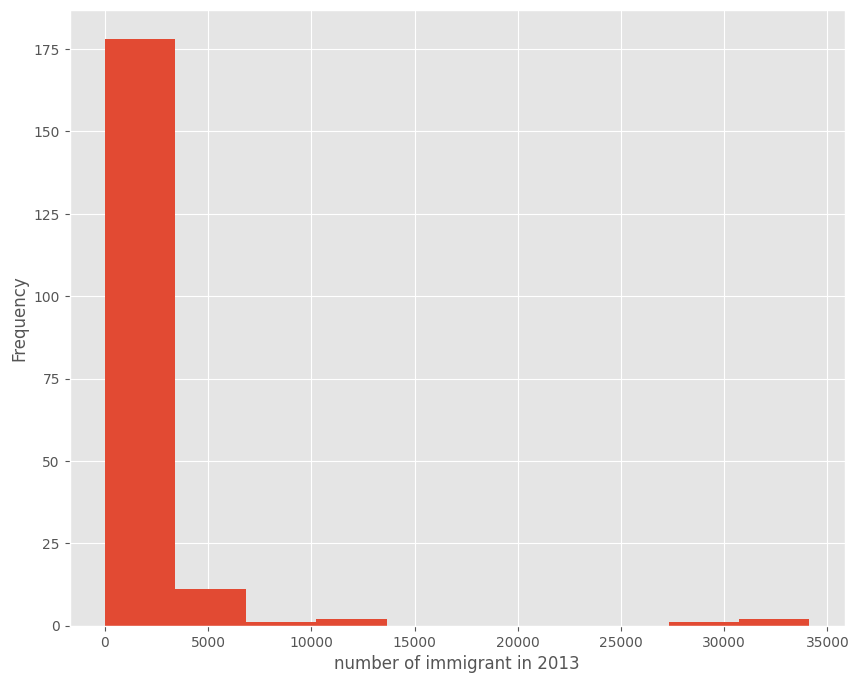

In [83]:
df_can['2013'].plot(kind = 'hist',figsize = (10,8))
plt.xlabel('number of immigrant in 2013')

<Axes: ylabel='Frequency'>

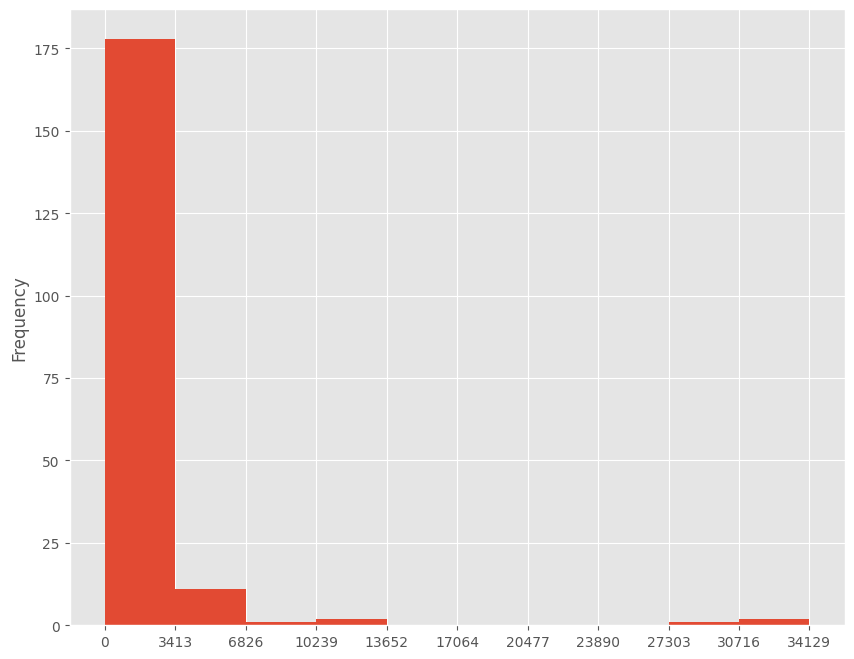

In [84]:
cnt,bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind = 'hist',figsize = (10,8), xticks = bin_edges)

Plot the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

In [89]:
df_can.loc[['Denmark', 'Norway', 'Sweden'],years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [90]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()

Text(0.5, 0, 'Number of Immigrants')

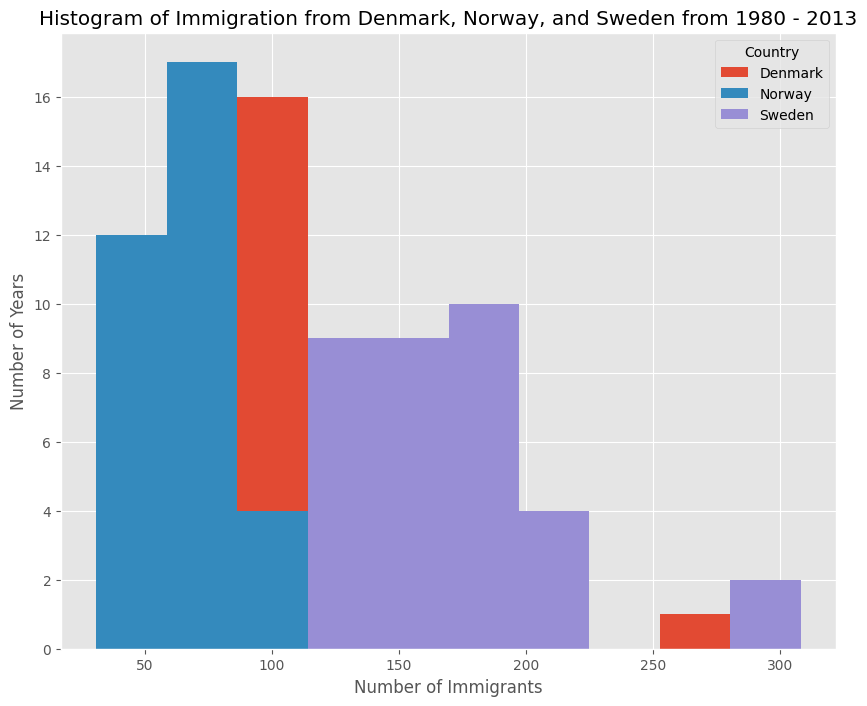

In [96]:
df_t.plot(kind = 'hist', figsize = (10,8))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

Text(0.5, 0, 'Number of Immigrants')

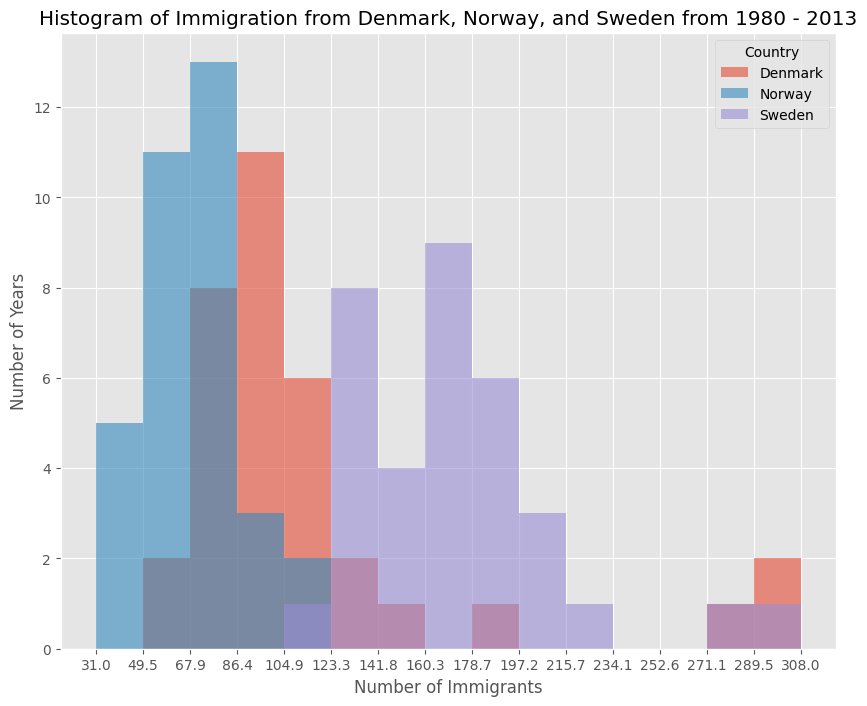

In [100]:
cnt, bin_edges = np.histogram(df_t,15)
df_t.plot(kind = 'hist',figsize = (10,8),
          bins = 15,
          xticks = bin_edges,
          alpha = 0.6
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [104]:
df_g= df_can.loc[['Greece','Albania','Bulgaria'],years].transpose()
df_g.index = df_g.index.map(int)
df_g

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11
1985,584,0,24
1986,547,1,33
1987,765,2,52
1988,564,2,43
1989,773,3,85


Text(0.5, 0, 'Number of Immigrants')

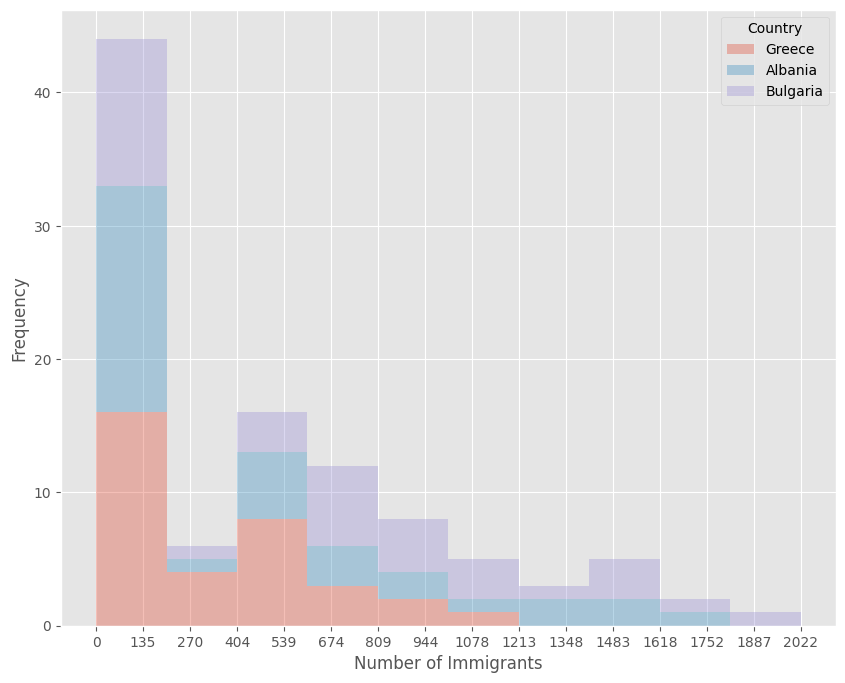

In [107]:
cnt,bin_edges = np.histogram(df_g,15)

df_g.plot(kind = 'hist',
          figsize = (10,8),
          xticks = bin_edges,
          stacked = True,
          alpha = 0.35
          )
plt.xlabel('Number of Immigrants')

## Bar Charts (Dataframe)

Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [110]:
df_iceland = df_can.loc['Iceland',years]
df_iceland

1980    17
1981    33
1982    10
1983     9
1984    13
1985     6
1986    11
1987    11
1988     7
1989     3
1990     2
1991    11
1992    17
1993    15
1994    11
1995     9
1996    14
1997    11
1998    20
1999    17
2000     9
2001    26
2002    11
2003    17
2004    23
2005    10
2006     2
2007    15
2008    13
2009    15
2010    30
2011    38
2012    42
2013    72
Name: Iceland, dtype: object

Text(0.5, 0, 'number of immigrants')

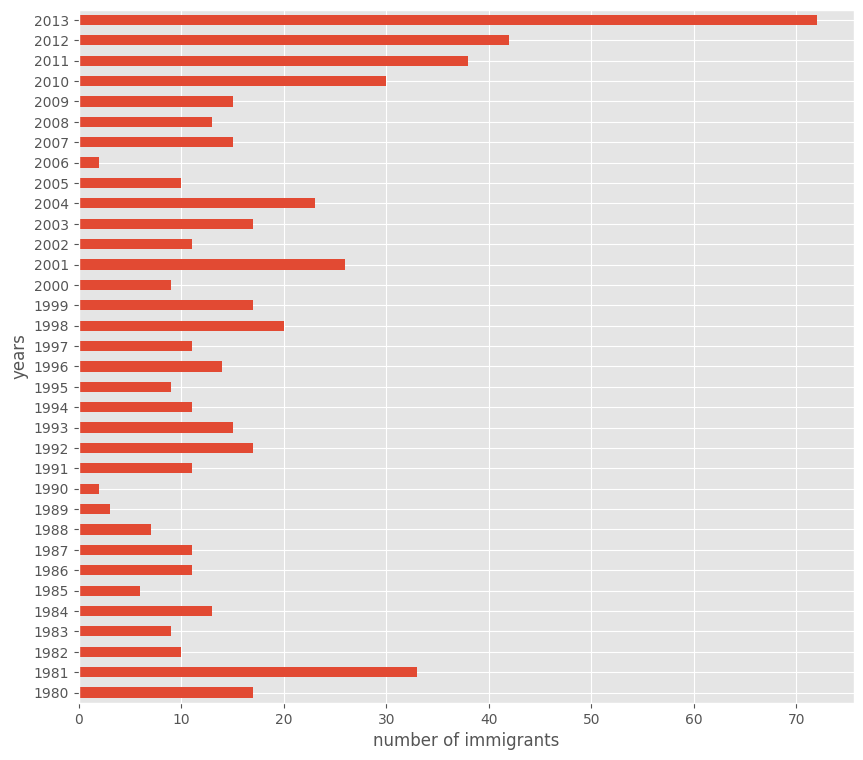

In [118]:
df_iceland.plot(kind = 'barh',figsize = (10,9) )
plt.ylabel('years')
plt.xlabel('number of immigrants')

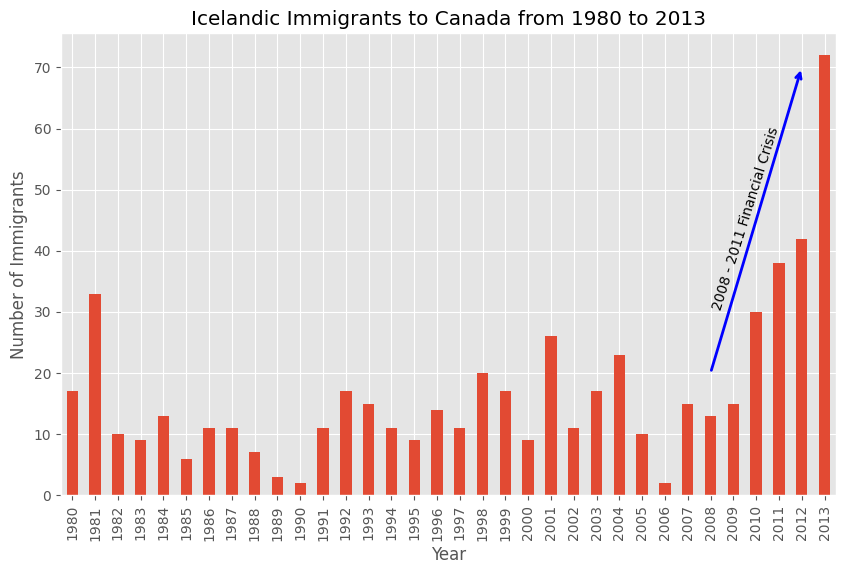

In [127]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

Question: Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [120]:
df_can.sort_values(['Total'],ascending = False, inplace = True)

In [130]:
df_top15 = df_can.head(15)
df_top15 = df_top15['Total'].transpose()
# df_top15.index = df_top15.index.map(int)
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

<Axes: ylabel='Country'>

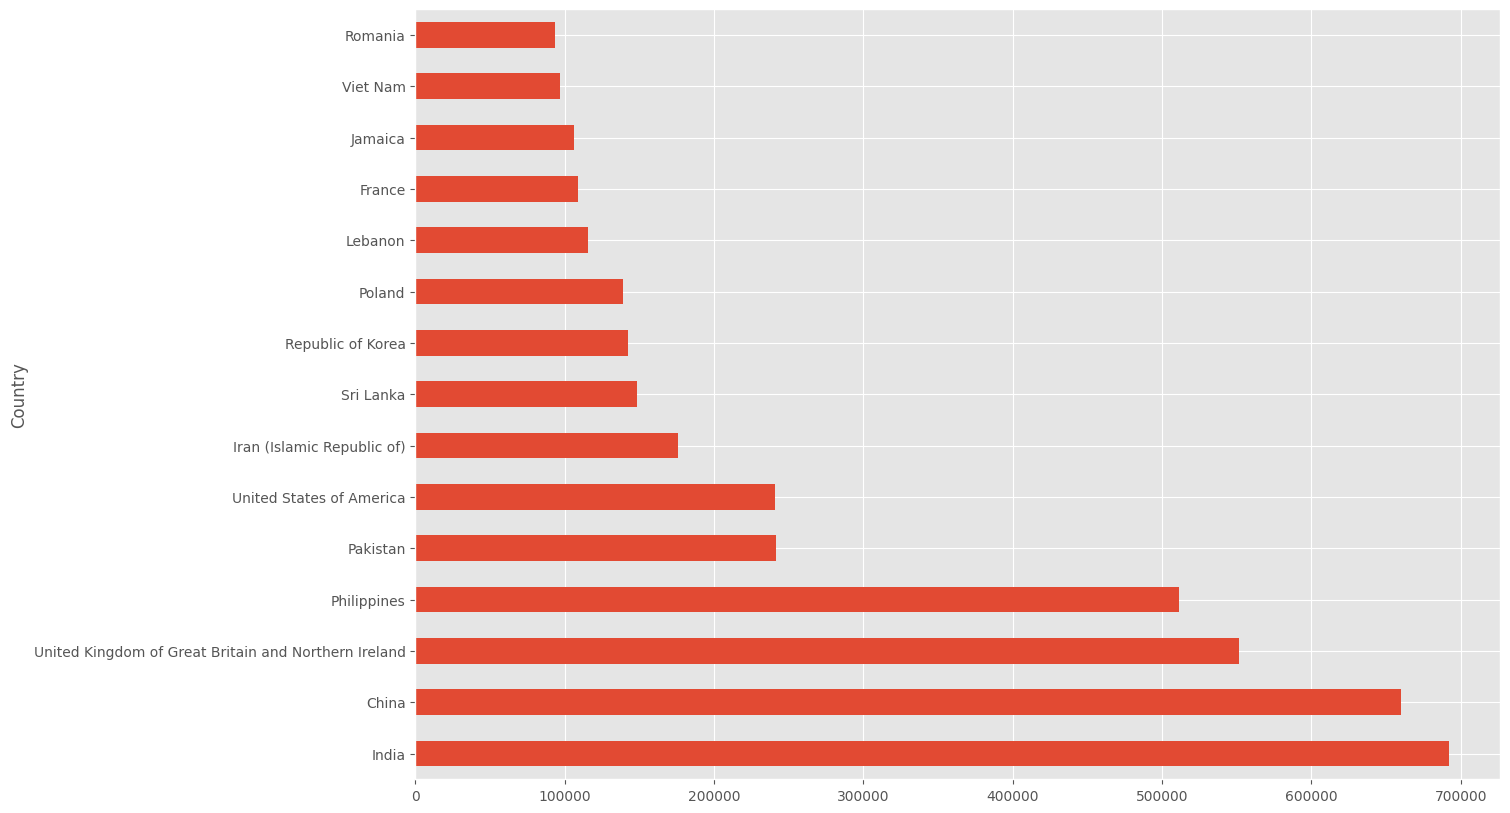

In [131]:
df_top15.plot(kind = 'barh',figsize = (14,10))